# Artificial Neural Network Heuristic: performance analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('seaborn-paper')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
# set matplotlib font to Times
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

## Data preprocessing

In [5]:
results = pd.read_csv("/home/batman/code/fifteen-puzzle/data/experiments/all-heuristics-benchmark-v1.csv")
results.shape

(1120, 9)

In [6]:
results.head(10)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-11-27 16:46:08.927855 PID8559,1,IDA*,PDB[Pat:8],RND,9.613334,62,115604,56.000000
1,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8],RND,10.806618,62,96436,56.000000
2,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.05],RND,1.375183,62,11963,58.800000
3,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.1],RND,0.159247,62,1584,61.600000
4,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.15],RND,0.222589,62,2209,64.400000
5,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:MSE],RND,20.451421,62,2662,61.662968
6,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.2],RND,4.571447,62,817,60.078194
7,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.4],RND,106.250757,62,18310,60.538765
8,2019-11-27 16:46:08.927855 PID8559,2,IDA*,PDB[Pat:8],RND,0.120881,47,1532,41.000000
9,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8],RND,0.402051,47,3195,41.000000


In [7]:
results["HEURISTIC_NAME"].unique()

array(['PDB[Pat:8]', 'PDB[Pat:8;W:1.05]', 'PDB[Pat:8;W:1.1]',
       'PDB[Pat:8;W:1.15]', 'ANN[Label:MSE]', 'ANN[Label:AMSE0.2]',
       'ANN[Label:AMSE0.4]'], dtype=object)

In [8]:
optimal_results = results[results["ALGORITHM_NAME"] == "IDA*"]

In [9]:
def optimal_cost(row):
    board_id = row["BOARD_ID"]
    pdb_row_df = optimal_results[optimal_results.BOARD_ID == board_id]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [10]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [11]:
results_complete.head(25)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-11-27 16:46:08.927855 PID8559,1,IDA*,PDB[Pat:8],RND,9.613334,62,115604,56.000000,62,0,-6.000000
1,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8],RND,10.806618,62,96436,56.000000,62,0,-6.000000
2,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.05],RND,1.375183,62,11963,58.800000,62,0,-3.200000
3,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.1],RND,0.159247,62,1584,61.600000,62,0,-0.400000
4,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.15],RND,0.222589,62,2209,64.400000,62,0,2.400000
5,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:MSE],RND,20.451421,62,2662,61.662968,62,0,-0.337032
6,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.2],RND,4.571447,62,817,60.078194,62,0,-1.921806
7,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.4],RND,106.250757,62,18310,60.538765,62,0,-1.461235
8,2019-11-27 16:46:08.927855 PID8559,2,IDA*,PDB[Pat:8],RND,0.120881,47,1532,41.000000,47,0,-6.000000
9,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8],RND,0.402051,47,3195,41.000000,47,0,-6.000000


In [12]:
pdb_results_complete = results_complete[
    (results_complete["HEURISTIC_NAME"] == "PDB[Pat:8]") & (results_complete["ALGORITHM_NAME"] == "A*")]
pdb105_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.05]"]
pdb110_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.1]"]
pdb115_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:8;W:1.15]"]
ann_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:MSE]"]
ann02_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:AMSE0.2]"]
ann04_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Label:AMSE0.4]"]

In [13]:
pdb_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
1,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8],RND,10.806618,62,96436,56.0,62,0,-6.0
9,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8],RND,0.402051,47,3195,41.0,47,0,-6.0
17,2019-11-27 16:46:08.927855 PID8559,3,A*,PDB[Pat:8],RND,1.312166,52,11767,46.0,52,0,-6.0
25,2019-11-27 16:46:08.927855 PID8559,4,A*,PDB[Pat:8],RND,0.232524,52,2413,46.0,52,0,-6.0
33,2019-11-27 16:46:08.927855 PID8559,5,A*,PDB[Pat:8],RND,0.521915,46,5160,40.0,46,0,-6.0


In [14]:
pdb105_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
2,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.05],RND,1.375183,62,11963,58.80,62,0,-3.20
10,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8;W:1.05],RND,0.063072,47,662,43.05,47,0,-3.95
18,2019-11-27 16:46:08.927855 PID8559,3,A*,PDB[Pat:8;W:1.05],RND,0.428502,52,3206,48.30,52,0,-3.70
26,2019-11-27 16:46:08.927855 PID8559,4,A*,PDB[Pat:8;W:1.05],RND,0.098853,52,1026,48.30,52,0,-3.70
34,2019-11-27 16:46:08.927855 PID8559,5,A*,PDB[Pat:8;W:1.05],RND,0.117744,46,1175,42.00,46,0,-4.00


In [15]:
pdb110_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
3,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.1],RND,0.159247,62,1584,61.6,62,0,-0.4
11,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8;W:1.1],RND,0.056589,47,592,45.1,47,0,-1.9
19,2019-11-27 16:46:08.927855 PID8559,3,A*,PDB[Pat:8;W:1.1],RND,0.327939,52,3208,50.6,52,0,-1.4
27,2019-11-27 16:46:08.927855 PID8559,4,A*,PDB[Pat:8;W:1.1],RND,0.102895,52,1070,50.6,52,0,-1.4
35,2019-11-27 16:46:08.927855 PID8559,5,A*,PDB[Pat:8;W:1.1],RND,0.117914,46,1182,44.0,46,0,-2.0


In [16]:
pdb115_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
4,2019-11-27 16:46:08.927855 PID8559,1,A*,PDB[Pat:8;W:1.15],RND,0.222589,62,2209,64.40,62,0,2.40
12,2019-11-27 16:46:08.927855 PID8559,2,A*,PDB[Pat:8;W:1.15],RND,0.025976,47,272,47.15,47,0,0.15
20,2019-11-27 16:46:08.927855 PID8559,3,A*,PDB[Pat:8;W:1.15],RND,0.250054,54,2439,52.90,52,2,0.90
28,2019-11-27 16:46:08.927855 PID8559,4,A*,PDB[Pat:8;W:1.15],RND,0.154246,52,1585,52.90,52,0,0.90
36,2019-11-27 16:46:08.927855 PID8559,5,A*,PDB[Pat:8;W:1.15],RND,0.130254,46,1297,46.00,46,0,0.00


In [17]:
ann_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
5,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:MSE],RND,20.451421,62,2662,61.662968,62,0,-0.337032
13,2019-11-27 16:46:08.927855 PID8559,2,A*,ANN[Label:MSE],RND,10.730211,47,1348,46.510372,47,0,-0.489628
21,2019-11-27 16:46:08.927855 PID8559,3,A*,ANN[Label:MSE],RND,47.426796,54,6058,52.578903,52,2,0.578903
29,2019-11-27 16:46:08.927855 PID8559,4,A*,ANN[Label:MSE],RND,17.492376,52,2218,52.607643,52,0,0.607643
37,2019-11-27 16:46:08.927855 PID8559,5,A*,ANN[Label:MSE],RND,8.762641,46,1121,45.818970,46,0,-0.181030


In [18]:
ann02_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
6,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.2],RND,4.571447,62,817,60.078194,62,0,-1.921806
14,2019-11-27 16:46:08.927855 PID8559,2,A*,ANN[Label:AMSE0.2],RND,1.279179,47,226,46.781898,47,0,-0.218102
22,2019-11-27 16:46:08.927855 PID8559,3,A*,ANN[Label:AMSE0.2],RND,9.593342,54,1667,51.370892,52,2,-0.629108
30,2019-11-27 16:46:08.927855 PID8559,4,A*,ANN[Label:AMSE0.2],RND,2.564924,52,436,51.694912,52,0,-0.305088
38,2019-11-27 16:46:08.927855 PID8559,5,A*,ANN[Label:AMSE0.2],RND,1.827841,46,330,46.056271,46,0,0.056271


In [19]:
ann04_results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
7,2019-11-27 16:46:08.927855 PID8559,1,A*,ANN[Label:AMSE0.4],RND,106.250757,62,18310,60.538765,62,0,-1.461235
15,2019-11-27 16:46:08.927855 PID8559,2,A*,ANN[Label:AMSE0.4],RND,22.554135,47,3922,46.309490,47,0,-0.690510
23,2019-11-27 16:46:08.927855 PID8559,3,A*,ANN[Label:AMSE0.4],RND,163.788611,54,28688,51.739182,52,2,-0.260818
31,2019-11-27 16:46:08.927855 PID8559,4,A*,ANN[Label:AMSE0.4],RND,52.887247,52,9225,51.184162,52,0,-0.815838
39,2019-11-27 16:46:08.927855 PID8559,5,A*,ANN[Label:AMSE0.4],RND,28.448699,46,5008,45.306992,46,0,-0.693008


## Analysis of results

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text yticklabel objects>)

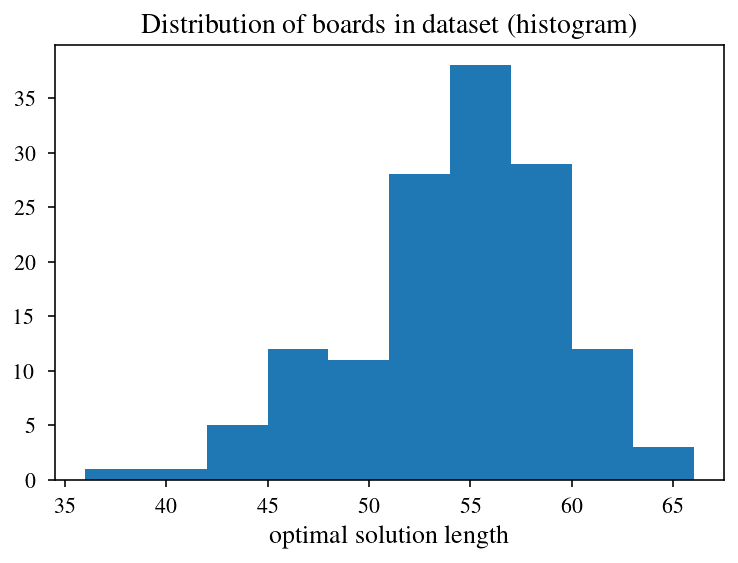

In [20]:
f = plt.figure()

plt.hist(pdb_results_complete["SOLUTION_COST"], bins=10);
plt.title("Distribution of boards in dataset (histogram)", fontsize=14)
plt.xlabel("optimal solution length", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# f.savefig("expr_boards-optimal-sol-len-distr.pdf", bbox_inches='tight')

In [21]:
pdb_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,1.400000e+02,140.000000,140.000000,140.0,140.000000
mean,70.5000,8.901473,53.885714,8.046488e+04,46.600000,53.885714,0.0,-7.285714
std,40.5586,42.963913,5.093494,4.014867e+05,4.996114,5.093494,0.0,2.251413
min,1.0000,0.026062,36.000000,2.470000e+02,28.000000,36.000000,0.0,-14.000000
25%,35.7500,0.752226,51.000000,6.935500e+03,44.000000,51.000000,0.0,-8.000000
50%,70.5000,2.259409,55.000000,2.032450e+04,47.000000,55.000000,0.0,-8.000000
75%,105.2500,5.240799,57.000000,4.535400e+04,50.000000,57.000000,0.0,-6.000000
max,140.0000,498.447340,66.000000,4.672647e+06,59.000000,66.000000,0.0,-2.000000


In [22]:
pdb105_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000
mean,70.5000,1.612313,53.885714,15255.642857,48.930000,53.885714,0.0,-4.955714
std,40.5586,7.576577,5.093494,74198.521034,5.245919,5.093494,0.0,2.309887
min,1.0000,0.007289,36.000000,67.000000,29.400000,36.000000,0.0,-11.400000
25%,35.7500,0.181538,51.000000,1539.250000,46.200000,51.000000,0.0,-5.925000
50%,70.5000,0.484101,55.000000,4513.000000,49.350000,55.000000,0.0,-5.400000
75%,105.2500,1.150465,57.000000,9995.500000,52.500000,57.000000,0.0,-3.500000
max,140.0000,88.206511,66.000000,864798.000000,61.950000,66.000000,0.0,0.350000


In [24]:
pdb110_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,0.721267,54.114286,6707.135714,51.260000,53.885714,0.228571,-2.625714
std,40.5586,1.829663,5.205263,18025.968550,5.495725,5.093494,0.638601,2.393137
min,1.0000,0.007095,36.000000,67.000000,30.800000,36.000000,0.000000,-8.800000
25%,35.7500,0.117543,51.000000,1147.500000,48.400000,51.000000,0.000000,-3.850000
50%,70.5000,0.265495,55.000000,2663.500000,51.700000,55.000000,0.000000,-2.800000
75%,105.2500,0.665275,58.000000,5776.250000,55.000000,57.000000,0.000000,-1.000000
max,140.0000,19.568253,66.000000,197192.000000,64.900000,66.000000,2.000000,2.700000


In [25]:
pdb115_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,0.424454,54.671429,3923.135714,53.590000,53.885714,0.785714,-0.295714
std,40.5586,0.780175,5.394432,7487.412497,5.745531,5.093494,1.167828,2.498687
min,1.0000,0.007178,36.000000,67.000000,32.200000,36.000000,0.000000,-6.200000
25%,35.7500,0.081109,51.750000,793.250000,50.600000,51.000000,0.000000,-1.775000
50%,70.5000,0.170859,55.000000,1639.000000,54.050000,55.000000,0.000000,-0.200000
75%,105.2500,0.394810,58.000000,3469.250000,57.500000,57.000000,2.000000,1.500000
max,140.0000,6.821191,67.000000,68841.000000,67.850000,66.000000,4.000000,5.050000


In [26]:
ann_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,116.590582,54.385714,14050.192857,53.835840,53.885714,0.500000,-0.049874
std,40.5586,166.073582,5.208717,20123.584776,5.321963,5.093494,0.933008,1.535161
min,1.0000,2.075576,38.000000,255.000000,35.566692,36.000000,0.000000,-3.464714
25%,35.7500,21.940497,51.000000,2660.500000,50.869714,51.000000,0.000000,-1.093883
50%,70.5000,56.749031,55.000000,6623.000000,54.603436,55.000000,0.000000,-0.109544
75%,105.2500,138.456701,58.000000,16240.250000,57.338883,57.000000,0.000000,0.806794
max,140.0000,947.617885,66.000000,112035.000000,67.158905,66.000000,4.000000,6.455860


In [27]:
ann02_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,30.354653,54.714286,5013.107143,53.444644,53.885714,0.828571,-0.441070
std,40.5586,48.460390,5.291891,8124.936571,5.023700,5.093494,1.099005,1.443590
min,1.0000,0.731977,38.000000,119.000000,35.198948,36.000000,0.000000,-4.007576
25%,35.7500,5.130508,52.000000,811.750000,50.856476,51.000000,0.000000,-1.171013
50%,70.5000,13.374149,55.000000,2244.000000,54.317126,55.000000,0.000000,-0.437225
75%,105.2500,32.069511,58.250000,5166.750000,57.180965,57.000000,2.000000,0.398698
max,140.0000,330.183342,66.000000,57296.000000,64.634201,66.000000,4.000000,5.526505


In [28]:
ann04_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,317.947003,54.314286,53867.092857,52.553433,53.885714,0.428571,-1.332281
std,40.5586,463.080986,5.196963,80604.496634,5.034012,5.093494,0.890743,1.432346
min,1.0000,2.664788,36.000000,447.000000,33.596912,36.000000,0.000000,-4.859871
25%,35.7500,72.510683,51.000000,11548.000000,49.914383,51.000000,0.000000,-2.301904
50%,70.5000,175.797366,55.000000,26515.500000,53.516386,55.000000,0.000000,-1.300290
75%,105.2500,342.992668,58.000000,55810.500000,55.927167,57.000000,0.000000,-0.528482
max,140.0000,3622.843541,66.000000,637405.000000,64.034660,66.000000,4.000000,4.893894


# Optimality of results

In [29]:
solution_length_errors_distribution = pd.DataFrame(ann_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,107
1,2,31
2,4,2


In [30]:
solution_length_errors_distribution = pd.DataFrame(ann02_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,86
1,2,50
2,4,4


In [31]:
solution_length_errors_distribution = pd.DataFrame(ann04_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,112
1,2,26
2,4,2


# Legacy section

/home/batman/.miniconda3/envs/fifteen-puzzle/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


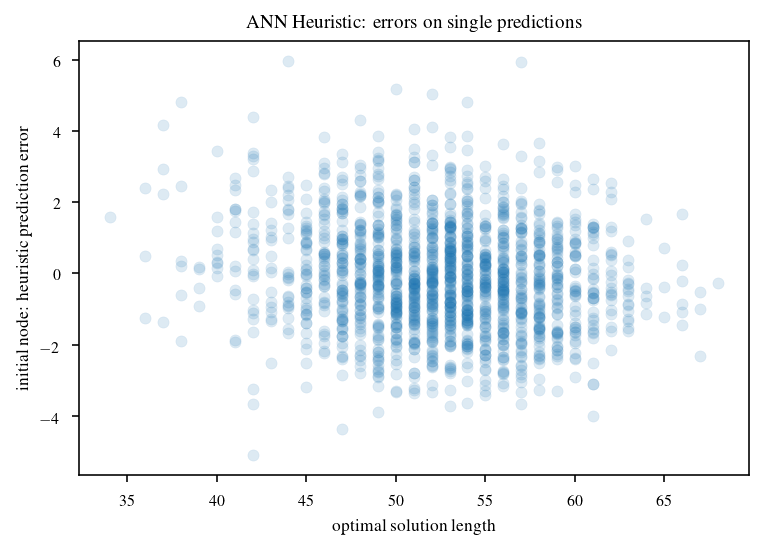

In [14]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"], alpha=0.15)
plt.title("ANN Heuristic: errors on single predictions")
plt.xlabel("optimal solution length")
plt.ylabel("initial node: heuristic prediction error");

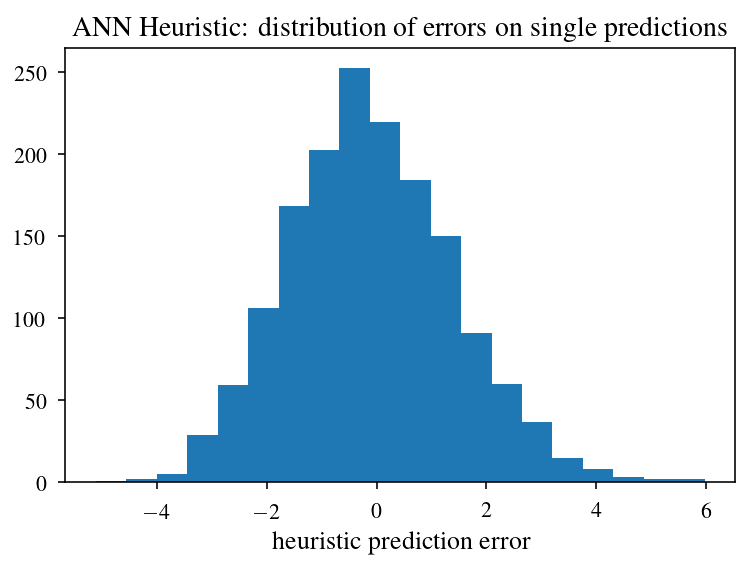

In [15]:
f = plt.figure()

plt.hist(ann_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'], bins=20)
plt.title("ANN Heuristic: distribution of errors on single predictions", fontsize=14)
plt.xlabel("heuristic prediction error", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_ann-heur-pred-error-distr.pdf", bbox_inches='tight')

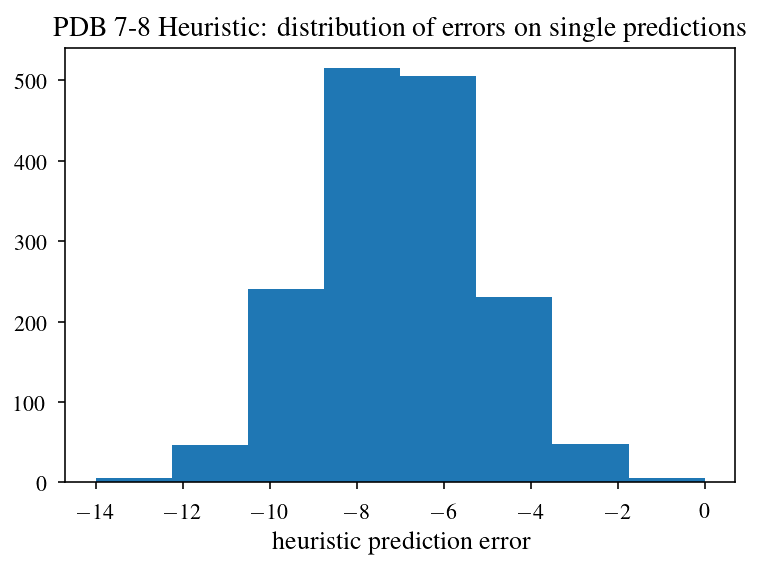

In [16]:
f = plt.figure()

plt.hist(pdb_results_complete['INITIAL_HEURISTIC_PREDICTION_ERROR'], bins=8)
plt.title("PDB 7-8 Heuristic: distribution of errors on single predictions", fontsize=14)
plt.xlabel("heuristic prediction error", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_pd87-heur-pred-error-distr.pdf", bbox_inches='tight')

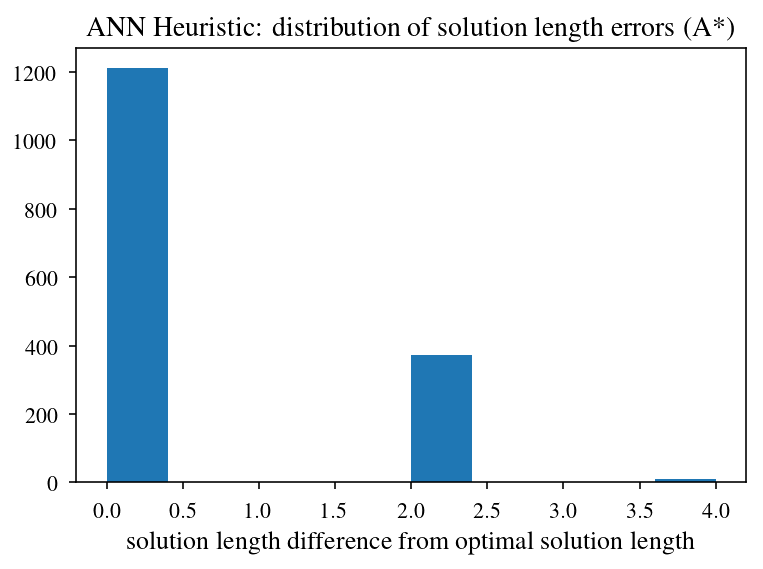

In [17]:
f = plt.figure()

plt.hist(ann_results_complete['SOLUTION_COST_ERROR'], bins=10)
plt.title("ANN Heuristic: distribution of solution length errors (A*)", fontsize=14)
plt.xlabel("solution length difference from optimal solution length", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_astar-ann-heur-optimal-error.pdf", bbox_inches='tight')

This is better represented by a table:

In [18]:
solution_length_errors_distribution = pd.DataFrame(ann_results_complete['SOLUTION_COST_ERROR'].value_counts()).reset_index()
solution_length_errors_distribution.columns = ['SOLUTION COST ERROR', 'BOARDS COUNT']

solution_length_errors_distribution

,SOLUTION COST ERROR,BOARDS COUNT
0,0,1211
1,2,373
2,4,11


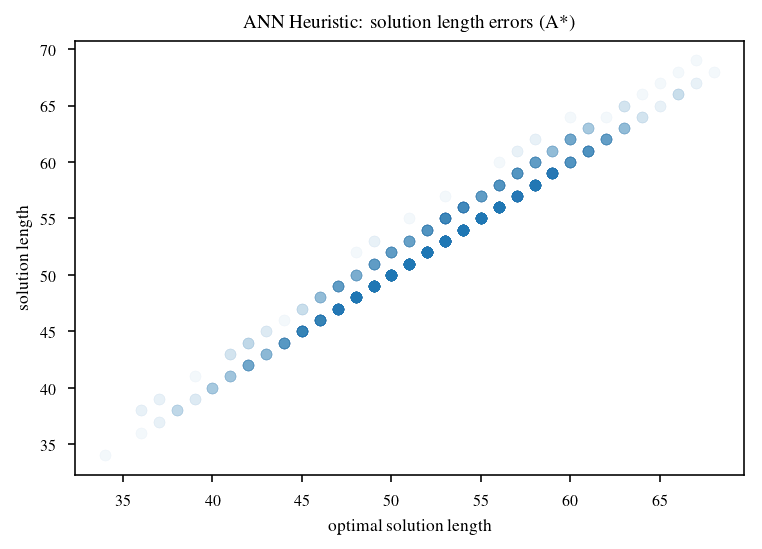

In [19]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"], alpha=0.05)
plt.title("ANN Heuristic: solution length errors (A*)")
plt.xlabel("optimal solution length")
plt.ylabel("solution length");

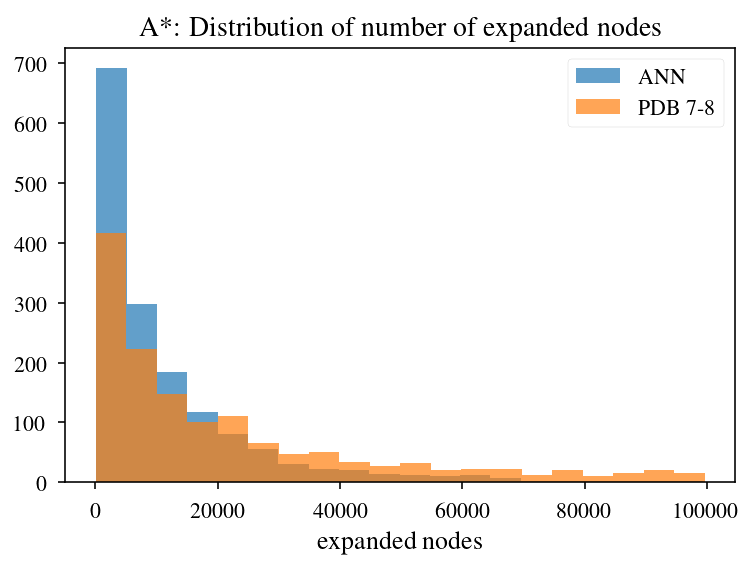

In [20]:
f = plt.figure()

plt.hist(ann_results_complete[ann_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'], bins=20, alpha=0.7, label="ANN");
plt.hist(pdb_results_complete[pdb_results_complete['EXPANDED_NODES'] < 100000]['EXPANDED_NODES'], bins=20, alpha=0.7, label="PDB 7-8");
plt.title("A*: Distribution of number of expanded nodes", fontsize=14)
plt.xlabel("expanded nodes", fontsize=13)
plt.legend(fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

f.savefig("expr_expand-nodes-distr.pdf", bbox_inches='tight')